In [351]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [160]:
#Loading the dataset
df = pd.read_csv('Badanie ankietowe.csv')
df = pd.DataFrame(df)
df.head()

,Sygnatura czasowa,Płeć:,Wiek:,Wykształcenie:,Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną,Proszę zaznaczyć rodzaj prowadzonej działalności HoReCa:,"Województwo, w którym znajduje się hotel/restauracja:",Większość przychodów przed pandemią pochodziło z obsługi:,Czy w ciągu ostatnich 12 miesięcy zauważono spadek przychodów?,Która fala pandemii była bardziej dotkliwa dla przedsiębiorstwa?,...,"Czy wybierając hotel/restaurację kierowałeś się kryterium, które gwarantowało przestrzeganie wytycznych sanitarnych (np. Obiekt bezpieczny higienicznie)?",Czy zauważyłeś zmiany związane z jakością usług podczas pandemii?,"Urlop, wolne weekendy w większości udało się spędzić:",Czy planując pobyt hotelowy musiałeś zrezygnować/zmienić datę pobytu?,Czy w przypadku rezygnacji udało się odzyskać pieniądze z zadatku/zaliczki?,Czy opcja bonu turystycznego zachęciła Cię do spędzenia urlopu w Polsce?,"Czy wprowadzenie dodatkowych obostrzeń (np. zamknięcie basenu, restauracji, siłowni) zniechęciłoby Cię do wyjazdu rekreacyjnego?","Czy strajki przedsiębiorców, akcje zachęcające do ratowania polskiej turystyki oraz informacje płynące z rynku o coraz słabszej sytuacji w finansowej wielu przedsiębiorstw zachęciły Cię do wspierania branży hotelarsko - gastronomicznej",Jak wspierałeś branże hotelarsko – gastronomiczną?,Czy w Twojej ocenie pomoc Rządu była wystarczająca aby pokryć koszty oraz straty spowodowane pandemią COVID-19?
0,2021/04/12 4:05:18 PM EET,Kobieta,16-24 lat,Średnie,Konsument/gość,NaN,NaN,NaN,NaN,NaN,...,Nie,Pozostała na tym samym poziomie.,W domu,Nie dotyczy,Nie dotyczy,Nie dotyczy,Tak,Tak,Regularne zamawianie jedzenia na wynos.,Nie
1,2021/04/12 4:09:38 PM EET,Kobieta,16-24 lat,Średnie,Pracownik,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021/04/12 4:13:08 PM EET,Kobieta,41-55 lat,Średnie,Pracownik,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/04/12 4:13:19 PM EET,Kobieta,16-24 lat,Wyższe,Konsument/gość,NaN,NaN,NaN,NaN,NaN,...,Nie,Pozostała na tym samym poziomie.,W domu,Nie dotyczy,Nie dotyczy,Nie dotyczy,Tak,Nie,Nie wspierałem,Nie
4,2021/04/12 4:14:34 PM EET,Kobieta,25-40 lat,Wyższe,Konsument/gość,NaN,NaN,NaN,NaN,NaN,...,Nie,Pozostała na tym samym poziomie.,W domu,Nie dotyczy,Nie dotyczy,Nie dotyczy,Tak,Tak,Regularne zamawianie jedzenia na wynos.,Nie


Data Preprocessing Part 1

In [135]:
df.shape

(147, 49)

In [136]:
#Dropping the identifier column
df_metrical=df[['Płeć:','Wiek:', 'Wykształcenie:','Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną']]
print(df_metrical)

         Płeć:      Wiek: Wykształcenie:  \
0      Kobieta  16-24 lat        Średnie   
1      Kobieta  16-24 lat        Średnie   
2      Kobieta  41-55 lat        Średnie   
3      Kobieta  16-24 lat         Wyższe   
4      Kobieta  25-40 lat         Wyższe   
..         ...        ...            ...   
142  Mężczyzna  25-40 lat         Wyższe   
143  Mężczyzna  41-55 lat        Średnie   
144    Kobieta  25-40 lat         Wyższe   
145    Kobieta  25-40 lat         Wyższe   
146    Kobieta  25-40 lat        Średnie   

    Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną  
0                                       Konsument/gość                      
1                                            Pracownik                      
2                                            Pracownik                      
3                                       Konsument/gość                      
4                                       Konsument/gość                      
..       

In [137]:
#Checking for empty fields.
if df_metrical.isnull().any().any():
    print("There are empty fields in the dataframe.")
else:
    print("There are no empty fields in the dataframe..")

There are no empty fields in the dataframe..


In [138]:
#Checking responses based on gender.
total_responders=df_metrical['Płeć:'].count()
woman_responders=df_metrical['Płeć:'].value_counts()['Kobieta']
man_respoders=df_metrical['Płeć:'].value_counts()['Mężczyzna']
print(f"In the study, a total of {total_responders} respondents participated, including {woman_responders} women and {man_respoders} mens.")

In the study, a total of 147 respondents participated, including 114 women and 33 mens.


In [139]:
#Checking age intervals
df_metrical['Wiek:'].value_counts()

Wiek:
16-24 lat         69
25-40 lat         55
41-55 lat         16
powyżej 55 lat     7
Name: count, dtype: int64

In [140]:
#Checking the level of education.
df_metrical['Wykształcenie:'].value_counts()

Wykształcenie:
Średnie       75
Wyższe        53
Podstawowe    10
Zawodowe       9
Name: count, dtype: int64

In [141]:
#Checking how many people from different groups responded to the survey questions.
num_of_entrepreneurs=df_metrical['Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną'].value_counts()['Osoba zarządzająca obiektem']
num_of_workers=df_metrical['Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną'].value_counts()['Pracownik']
num_of_guests=df_metrical['Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną'].value_counts()['Konsument/gość']
print(f"The impact of the COVID-19 pandemic on the HoReCa industry was examined from the perspective of {num_of_entrepreneurs} respondents in a managerial position, {num_of_workers} respondents as employees, and {num_of_guests} respondents as consumers/guests.")

The impact of the COVID-19 pandemic on the HoReCa industry was examined from the perspective of 21 respondents in a managerial position, 44 respondents as employees, and 82 respondents as consumers/guests.


In [ ]:
Checking the impact of the COVID-19 pandemic on the HoReCa industry from a managerial perspective.

In [333]:
#Data cleansing, which will pertain only to managerial personnel.
menagerial=(df[df['Proszę zaznaczyć swoje powiązanie z branżą hotelarsko - gastronomiczną']=='Osoba zarządzająca obiektem']).dropna(axis=1, how='all')
# print(menagerial)

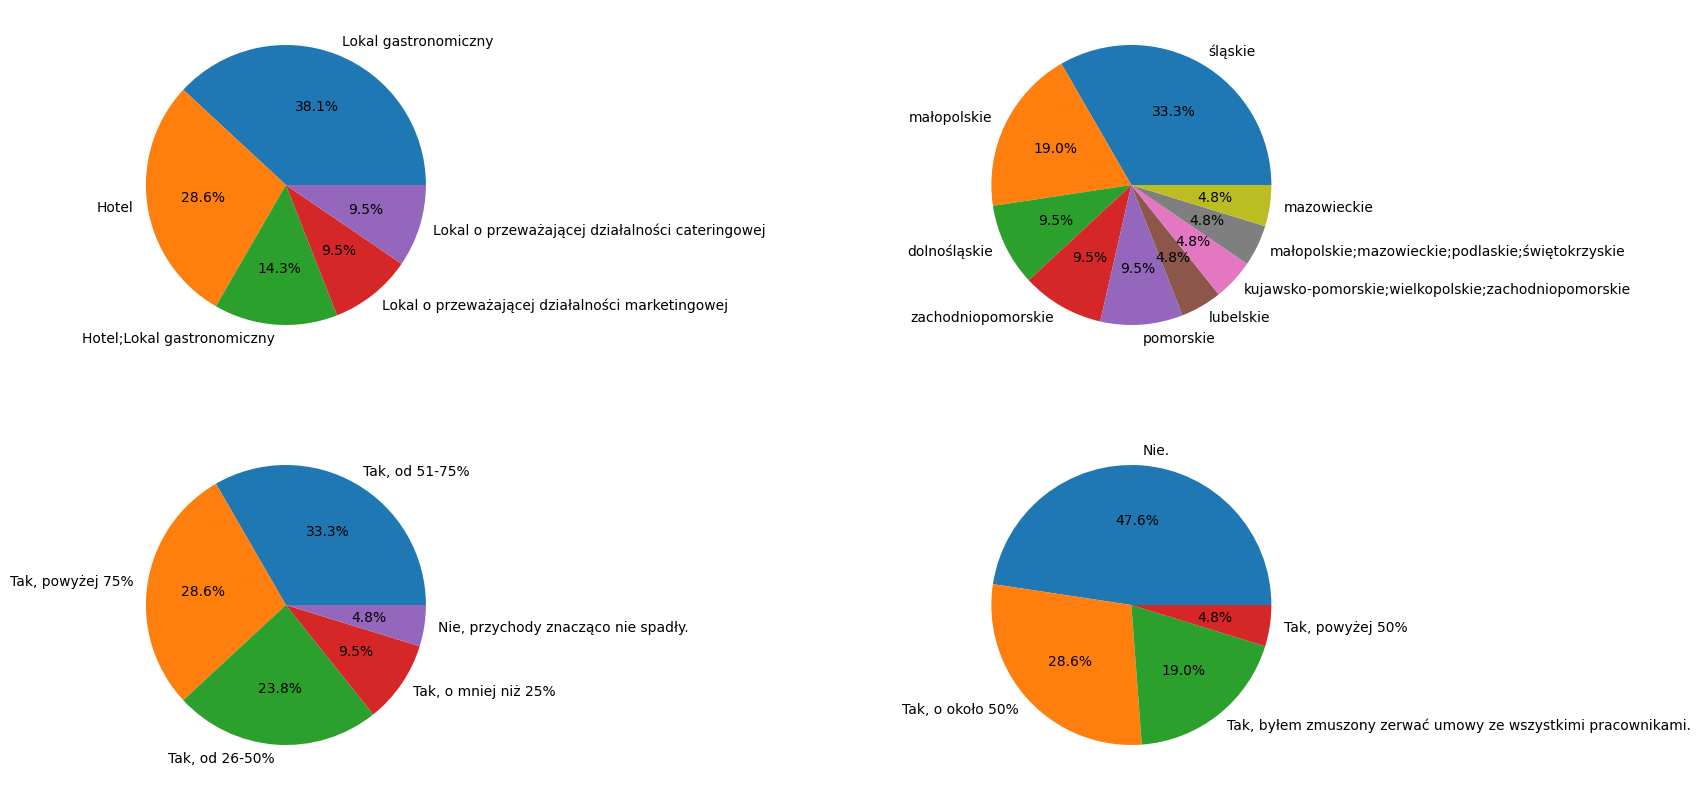

In [349]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
#Type of conducted business
ax[0,0].pie(list((menagerial["Proszę zaznaczyć rodzaj prowadzonej działalności HoReCa:"].value_counts().to_dict()).values()), labels=list((menagerial["Proszę zaznaczyć rodzaj prowadzonej działalności HoReCa:"].value_counts().to_dict()).keys()), autopct='%1.1f%%');
#Voivodeships
ax[0,1].pie(list((menagerial["Województwo, w którym znajduje się hotel/restauracja:"].value_counts().to_dict()).values()), labels=list((menagerial["Województwo, w którym znajduje się hotel/restauracja:"].value_counts().to_dict()).keys()), autopct='%1.1f%%');
#Incomes
ax[1,0].pie(list((menagerial["Czy w ciągu ostatnich 12 miesięcy zauważono spadek przychodów? "].value_counts().to_dict()).values()), labels=list((menagerial["Czy w ciągu ostatnich 12 miesięcy zauważono spadek przychodów? "].value_counts().to_dict()).keys()), autopct='%1.1f%%');
ax[1,1].pie(list((menagerial["Czy konieczna była redukcja zatrudnienia?"].value_counts().to_dict()).values()), labels=list((menagerial["Czy konieczna była redukcja zatrudnienia?"].value_counts().to_dict()).keys()), autopct='%1.1f%%');

In [352]:
menagerial_1=menagerial["Proszę zaznaczyć rodzaj prowadzonej działalności HoReCa:"]
menagerial_1=pd.DataFrame(menagerial_1)
print(menagerial_1)

    Proszę zaznaczyć rodzaj prowadzonej działalności HoReCa:
14                          Hotel;Lokal gastronomiczny      
50                                               Hotel      
59                                Lokal gastronomiczny      
114   Lokal o przeważającej działalności marketingowej      
127                               Lokal gastronomiczny      
129                                              Hotel      
130                               Lokal gastronomiczny      
131                               Lokal gastronomiczny      
132                         Hotel;Lokal gastronomiczny      
133   Lokal o przeważającej działalności marketingowej      
134                                              Hotel      
135                         Hotel;Lokal gastronomiczny      
136                               Lokal gastronomiczny      
137                               Lokal gastronomiczny      
138                                              Hotel      
139                     